In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel("Default1.xlsx")
data

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [14]:
# data.shape
# data.info()
# data.describe(include='all')
# (data.balance==0).sum(axis=0)
# data.student.value_counts()

# Encoding categorical variable
# data['default2']=data.default.factorize()[0]
# data['student2']=data.student.factorize()[0]
# data.head(3)



,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,Yes,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,0
2,3,No,No,1073.549164,31767.138947,0,1


In [16]:
data_dfno = data[data.default2 == 0].sample(frac=0.15)
data_dfyes = data[data.default2==1]
data_df = data_dfno.append(data_dfyes)
data_df

C:\Users\student\AppData\Local\Temp\ipykernel_14140\1299994648.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_dfno.append(data_dfyes)


,Unnamed: 0,default,student,balance,income,default2,student2
787,788,No,No,1180.447542,43914.419819,0,1
2249,2250,No,No,988.667818,28486.339752,0,1
5602,5603,No,No,309.517982,35293.193571,0,1
5881,5882,No,Yes,869.772061,18724.403676,0,0
9073,9074,No,No,0.000000,31722.329675,0,1
...,...,...,...,...,...,...,...
9912,9913,Yes,No,2148.898454,44309.917173,1,1
9921,9922,Yes,Yes,1627.898323,17546.997016,1,0
9949,9950,Yes,No,1750.253150,51578.940163,1,1
9951,9952,Yes,No,1515.606239,48688.512086,1,1


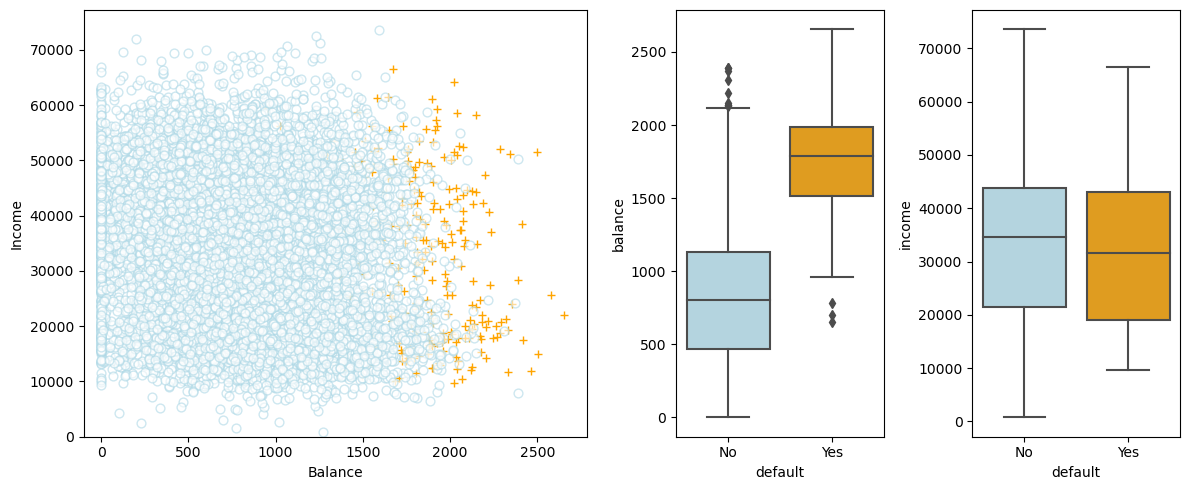

In [40]:
fig = plt.figure(figsize=(12,5))
gs= mpl.gridspec.GridSpec(1,4)
ax1=plt.subplot(gs[0,:2])
ax2=plt.subplot(gs[0,2:3])
ax3=plt.subplot(gs[0,3:4])
ax1.scatter(data[data.default=="Yes"].balance,data[data.default=="Yes"].income,s=40,c='orange',marker='+',linewidths=1)
ax1.scatter(data[data.default=="No"].balance,data[data.default=="No"].income,s=40,marker='o',linewidths=1,edgecolors='lightblue',facecolors="white",alpha=.6)

# Graphical representation
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')
c_palette ={'No':'lightblue','Yes':'orange'}
sns.boxplot(x=data['default'],y=data['balance'],orient='v',ax=ax2,palette=c_palette)
sns.boxplot(x=data['default'],y=data['income'],orient='v',ax=ax3,palette=c_palette)
gs.tight_layout(plt.gcf())